In [1]:
pip install pystan

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/d4/d3/4667b1913890108c9d2c46e2cc22cdb6bf20edc6ea910c8d0b8dab622a0e/pystan-3.8.0-py3-none-any.whl.metadata
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
INFO: pip is still looking at multiple versions of pystan to determine which version is com

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



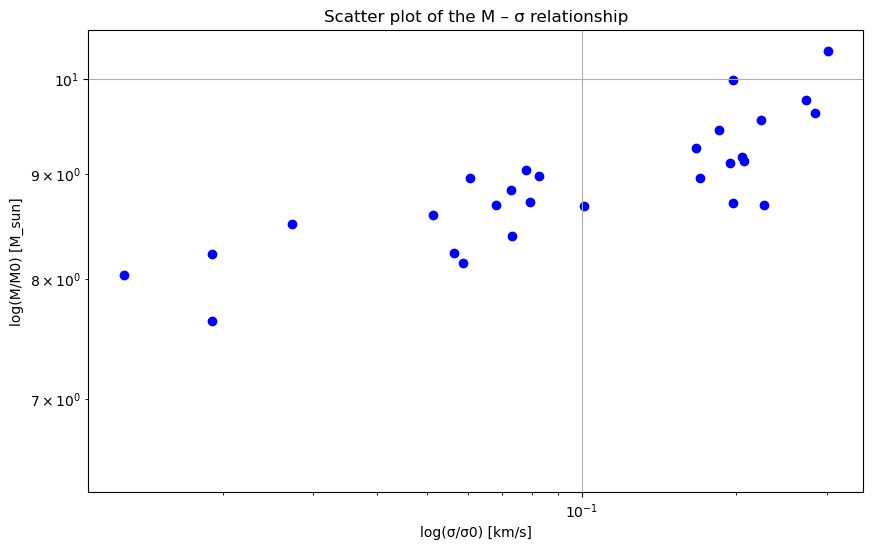

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('M_sigma.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['obsx'], df['obsy'], c='blue', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(σ/σ0) [km/s]')
plt.ylabel('log(M/M0) [M_sun]')
plt.title('Scatter plot of the M – σ relationship')
plt.grid(True)
plt.show()


# Adding error bars

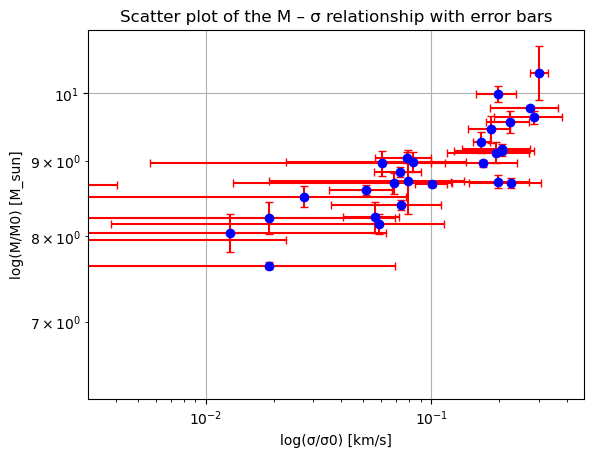

In [4]:
plt.errorbar(df['obsx'], df['obsy'], xerr=df['errx'], yerr=df['erry'], fmt='o', color='blue', ecolor='red', capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(σ/σ0) [km/s]')
plt.ylabel('log(M/M0) [M_sun]')
plt.title('Scatter plot of the M – σ relationship with error bars')
plt.grid(True)
plt.show()


# Fitting the required model

In [6]:
import numpy as np
from scipy.optimize import curve_fit

def model(x, alpha, beta):
    return alpha + beta * x
xdata = df['obsx']
ydata = df['obsy']
popt, pcov = curve_fit(model, xdata, ydata)

alpha_opt, beta_opt = popt

print(f"Optimized alpha: {alpha_opt}")
print(f"Optimized beta: {beta_opt}")


Optimized alpha: 8.328958714098125
Optimized beta: 4.4913965505239


# Task 4

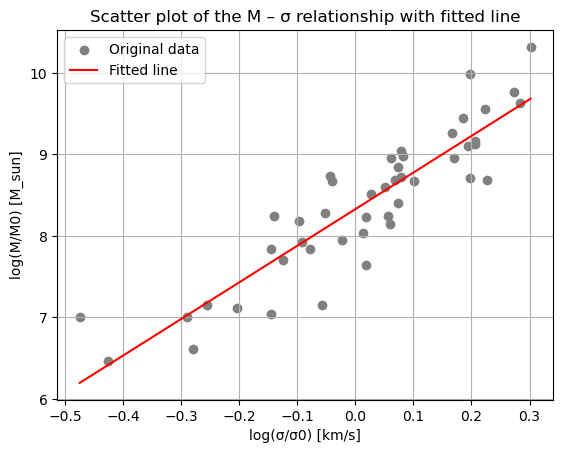

In [7]:
x_fit = np.linspace(min(xdata), max(xdata), 1000)

y_fit = model(x_fit, alpha_opt, beta_opt)

plt.scatter(xdata, ydata, color='gray', label='Original data')

plt.plot(x_fit, y_fit, color='red', label='Fitted line')

plt.xlabel('log(σ/σ0) [km/s]')
plt.ylabel('log(M/M0) [M_sun]')
plt.title('Scatter plot of the M – σ relationship with fitted line')
plt.legend()
plt.grid(True)
plt.show()


# TASK-5

In [ ]:
import pymc3 as pm
import numpy as np

xdata = df['obsx']
ydata = df['obsy']
yerr = df['erry'] 

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    likelihood = pm.Normal('y', mu=alpha + beta * xdata, sd=sigma + yerr, observed=ydata)

    trace = pm.sample(2000, tune=1000)

pm.summary(trace).round(2)
